# 07_1_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_1_LEARN_DataAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [58]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setting up the AutoML library

In [13]:
%%capture 
!pip install h2o

In [14]:
import h2o
from h2o.automl import H2OAutoML

In [15]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,7 mins 15 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,4 months and 9 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_aref2e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### 1.1 Import out dataframe to h20 object

Train a model based on the target and the df

In [16]:
# Run ML with new input 
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
new_input_for_ml

,Unnamed: 0,Line_name,G8H,inf_promoter1,inf_promoter2,CPR,norm_strict_x,norm_strict_y,norm_strict_mean
0,0,yp49_A01,1,2,5,1,0.972701,1.796170,1.384435
1,1,yp49_C01,1,2,5,9,0.536658,0.738584,0.637621
2,2,yp49_D01,2,4,7,3,0.175896,0.109680,0.142788
3,3,yp49_E01,2,1,5,7,0.345201,0.228028,0.286614
4,4,yp49_F01,3,3,6,1,26.416324,23.762944,25.089634
...,...,...,...,...,...,...,...,...,...
164,164,yp51_C12,8,3,7,2,0.000000,0.089923,0.044961
165,165,yp51_D12,8,2,7,6,0.614962,1.264863,0.939912
166,166,yp51_E12,8,1,6,10,0.466688,2.068186,1.267437
167,167,yp50_F05,6,1,8,2,15.155009,12.813656,13.984332


In [17]:
# Choosing which coloums to train on 
new_input_for_ml = new_input_for_ml[['Line_name','G8H','inf_promoter1','inf_promoter2','CPR','norm_strict_x']]
new_input_for_ml.columns = ['Line_name','0','1','2','3','Amt_norm']

In [18]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:169
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.562130177514794,2.6745562130177514,6.562130177514795,5.313609467455618,17.036217794033266
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.2461576095106213,1.1575337897875204,1.1639363454615026,2.8203962679881105,40.46203195493379
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_C01,1.0,2.0,5.0,9.0,0.5366584806139938
2,yp49_D01,2.0,4.0,7.0,3.0,0.1758959746019849


In [19]:
# Since the data is categorical we need to make it from numerical to categorical 
df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [20]:
df_test.describe()

Rows:169
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,17.036217794033266
maxs,NaN,,,,,277.3078163064027
sigma,NaN,,,,,40.46203195493379
zeros,0,,,,,59
missing,0,0,0,0,0,0
0,yp49_A01,1,2,5,1,0.972700677969159
1,yp49_C01,1,2,5,9,0.5366584806139938
2,yp49_D01,2,4,7,3,0.1758959746019849


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2. RUN automl

Here we are defining the autoML object and after we can train it

In [21]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    exclude_algos = ["StackedEnsemble"],
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [22]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 ) 


AutoML progress: |█
08:40:57.319: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 169.0.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 46.8 s, sys: 4.28 s, total: 51.1 s
Wall time: 1h 4s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20221118_84054_model_13


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,691,690 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,5.0,,,,,,,,,
1,,2,50,RectifierDropout,40.0,0.0,0.0,0.141398,0.347256,0.0,-0.063293,0.300032,-0.093509,0.260826
2,,3,1,Linear,,0.0,0.0,0.002022,0.002952,0.0,0.095935,0.440268,-0.221382,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 36.83339124308828
RMSE: 6.069051922919121
MAE: 2.3250924013937078
RMSLE: NaN
Mean Residual Deviance: 36.83339124308828

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 403.2667919807394
RMSE: 20.08150372807623
MAE: 9.621868016430318
RMSLE: NaN
Mean Residual Deviance: 403.2667919807394

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.610113,1.957003,9.396494,12.717479,8.362749,9.950296,7.623547
1,mean_residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
2,mse,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
3,r2,0.681344,0.278347,0.788591,0.185292,0.797152,0.846683,0.789001
4,residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
5,rmse,19.690731,4.243340,23.298018,24.754055,17.566793,18.345260,14.489524
6,rmsle,1.076070,0.000000,1.076070,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-11-18 09:40:37,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-11-18 09:40:37,9 min 35.343 sec,140833 obs/sec,10.0,1,1690.0,37.279289,1389.745375,18.271087,0.146080
2,,2022-11-18 09:40:42,9 min 40.337 sec,175922 obs/sec,5210.0,521,880490.0,6.507322,42.345244,2.645097,0.973981
3,,2022-11-18 09:40:45,9 min 43.422 sec,209238 obs/sec,10010.0,1001,1691690.0,6.069052,36.833391,2.325092,0.977368



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.078443
1,3.6,0.831848,0.831848,0.065252
2,1.4,0.826666,0.826666,0.064846
3,2.7,0.767678,0.767678,0.060219
4,1.3,0.732449,0.732449,0.057455
5,2.8,0.720832,0.720832,0.056544
6,0.8,0.683276,0.683276,0.053598
7,3.10,0.642205,0.642205,0.050376
8,1.2,0.582760,0.582760,0.045713
9,0.5,0.572917,0.572917,0.044941



See the whole table with table.as_data_frame()


In [23]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [24]:
# saving the models
leaderboard = AutoML.leaderboard
lb= leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [25]:
len(model_ids)

1265

Now we want to extract the best models that are not StackedEnsemble

In [26]:

df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,DeepLearning_grid_1_AutoML_2_20221118_84054_model_13,20.081504,403.266792,9.621868,NaN,403.266792
1,DeepLearning_grid_1_AutoML_2_20221118_84054_model_6,21.335421,455.200174,8.889342,NaN,455.200174
2,DeepLearning_grid_1_AutoML_2_20221118_84054_model_1,21.478471,461.324710,11.232652,NaN,461.324710
3,DeepLearning_grid_1_AutoML_2_20221118_84054_model_9,21.536027,463.800457,11.681315,NaN,463.800457
4,DeepLearning_grid_1_AutoML_2_20221118_84054_model_7,22.042840,485.886791,12.109385,NaN,485.886791
...,...,...,...,...,...,...
1260,XGBoost_grid_1_AutoML_2_20221118_84054_model_123,36.282169,1316.395771,20.844262,1.944838,1316.395771
1261,XGBoost_grid_1_AutoML_2_20221118_84054_model_468,37.191886,1383.236351,22.463851,NaN,1383.236351
1262,XGBoost_grid_1_AutoML_2_20221118_84054_model_369,38.137445,1454.464744,19.520070,NaN,1454.464744
1263,XGBoost_grid_1_AutoML_2_20221118_84054_model_36,38.601688,1490.090292,15.416279,1.179757,1490.090292


In [27]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221118_84054_model_13,20.0815,403.267,9.62187,nan,403.267
DeepLearning_grid_1_AutoML_2_20221118_84054_model_6,21.3354,455.2,8.88934,nan,455.2
DeepLearning_grid_1_AutoML_2_20221118_84054_model_1,21.4785,461.325,11.2327,nan,461.325
DeepLearning_grid_1_AutoML_2_20221118_84054_model_9,21.536,463.8,11.6813,nan,463.8
DeepLearning_grid_1_AutoML_2_20221118_84054_model_7,22.0428,485.887,12.1094,nan,485.887
XGBoost_grid_1_AutoML_2_20221118_84054_model_292,22.4583,504.377,10.4297,nan,504.377
XGBoost_grid_1_AutoML_2_20221118_84054_model_165,22.6711,513.979,10.462,nan,513.979
XGBoost_grid_1_AutoML_2_20221118_84054_model_77,22.6889,514.788,10.8729,nan,514.788
XGBoost_grid_1_AutoML_2_20221118_84054_model_178,22.9722,527.721,10.9532,nan,527.721
XGBoost_grid_1_AutoML_2_20221118_84054_model_886,23.008,529.369,10.9511,nan,529.369


### 3.1 Saving the best model

In [28]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20221118_84054_model_13


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,691,690 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,5.0,,,,,,,,,
1,,2,50,RectifierDropout,40.0,0.0,0.0,0.141398,0.347256,0.0,-0.063293,0.300032,-0.093509,0.260826
2,,3,1,Linear,,0.0,0.0,0.002022,0.002952,0.0,0.095935,0.440268,-0.221382,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 36.83339124308828
RMSE: 6.069051922919121
MAE: 2.3250924013937078
RMSLE: NaN
Mean Residual Deviance: 36.83339124308828

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 403.2667919807394
RMSE: 20.08150372807623
MAE: 9.621868016430318
RMSLE: NaN
Mean Residual Deviance: 403.2667919807394

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.610113,1.957003,9.396494,12.717479,8.362749,9.950296,7.623547
1,mean_residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
2,mse,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
3,r2,0.681344,0.278347,0.788591,0.185292,0.797152,0.846683,0.789001
4,residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
5,rmse,19.690731,4.243340,23.298018,24.754055,17.566793,18.345260,14.489524
6,rmsle,1.076070,0.000000,1.076070,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-11-18 09:40:37,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-11-18 09:40:37,9 min 35.343 sec,140833 obs/sec,10.0,1,1690.0,37.279289,1389.745375,18.271087,0.146080
2,,2022-11-18 09:40:42,9 min 40.337 sec,175922 obs/sec,5210.0,521,880490.0,6.507322,42.345244,2.645097,0.973981
3,,2022-11-18 09:40:45,9 min 43.422 sec,209238 obs/sec,10010.0,1001,1691690.0,6.069052,36.833391,2.325092,0.977368



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.078443
1,3.6,0.831848,0.831848,0.065252
2,1.4,0.826666,0.826666,0.064846
3,2.7,0.767678,0.767678,0.060219
4,1.3,0.732449,0.732449,0.057455
5,2.8,0.720832,0.720832,0.056544
6,0.8,0.683276,0.683276,0.053598
7,3.10,0.642205,0.642205,0.050376
8,1.2,0.582760,0.582760,0.045713
9,0.5,0.572917,0.572917,0.044941



See the whole table with table.as_data_frame()


In [29]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

### 3.2 Exporting the leaderboard

In [30]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [31]:
models_path = "ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221118_84054_model_13,20.0815,403.267,9.62187,nan,403.267
DeepLearning_grid_1_AutoML_2_20221118_84054_model_6,21.3354,455.2,8.88934,nan,455.2
DeepLearning_grid_1_AutoML_2_20221118_84054_model_1,21.4785,461.325,11.2327,nan,461.325
DeepLearning_grid_1_AutoML_2_20221118_84054_model_9,21.536,463.8,11.6813,nan,463.8
DeepLearning_grid_1_AutoML_2_20221118_84054_model_7,22.0428,485.887,12.1094,nan,485.887
XGBoost_grid_1_AutoML_2_20221118_84054_model_292,22.4583,504.377,10.4297,nan,504.377
XGBoost_grid_1_AutoML_2_20221118_84054_model_165,22.6711,513.979,10.462,nan,513.979
XGBoost_grid_1_AutoML_2_20221118_84054_model_77,22.6889,514.788,10.8729,nan,514.788
XGBoost_grid_1_AutoML_2_20221118_84054_model_178,22.9722,527.721,10.9532,nan,527.721
XGBoost_grid_1_AutoML_2_20221118_84054_model_886,23.008,529.369,10.9511,nan,529.369


In [32]:
lb.sort(3)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_2_20221118_84054_model_6,21.3354,455.2,8.88934,nan,455.2
DeepLearning_grid_1_AutoML_2_20221118_84054_model_13,20.0815,403.267,9.62187,nan,403.267
XGBoost_grid_1_AutoML_2_20221118_84054_model_292,22.4583,504.377,10.4297,nan,504.377
XGBoost_grid_1_AutoML_2_20221118_84054_model_165,22.6711,513.979,10.462,nan,513.979
DeepLearning_grid_1_AutoML_2_20221118_84054_model_11,24.6619,608.208,10.5661,nan,608.208
DeepLearning_grid_1_AutoML_2_20221118_84054_model_12,23.676,560.551,10.7602,nan,560.551
DeepLearning_grid_1_AutoML_2_20221118_84054_model_3,25.6265,656.716,10.8326,nan,656.716
XGBoost_grid_1_AutoML_2_20221118_84054_model_77,22.6889,514.788,10.8729,nan,514.788
DeepLearning_grid_1_AutoML_2_20221118_84054_model_14,23.9987,575.937,10.9383,nan,575.937
XGBoost_grid_1_AutoML_2_20221118_84054_model_886,23.008,529.369,10.9511,nan,529.369


## 4. Importing the best model

In [33]:
#DeepLearning_grid_3_AutoML_1_20221116_124805_model_1
#DeepLearning_grid_3_AutoML_1_20221114_143126_model_10
#DeepLearning_grid_2_AutoML_1_20220919_101302_model_8
# GBM_grid_1_AutoML_1_20221115_160941_model_42

In [34]:
# old best model DeepLearning_grid_2_AutoML_1_20220727_100352_model_37

best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models/"+lb[0,0]) #DeepLearning_grid_2_AutoML_1_20220919_101302_model_8 #DeepLearning_grid_3_AutoML_1_20221114_143126_model_10
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models/")
uploaded_model = h2o.upload_model(my_local_model)


In [35]:
best_model

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20221118_84054_model_13


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 1,601 weights/biases, 22.4 KB, 1,691,690 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,5.0,,,,,,,,,
1,,2,50,RectifierDropout,40.0,0.0,0.0,0.141398,0.347256,0.0,-0.063293,0.300032,-0.093509,0.260826
2,,3,1,Linear,,0.0,0.0,0.002022,0.002952,0.0,0.095935,0.440268,-0.221382,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 36.83339124308828
RMSE: 6.069051922919121
MAE: 2.3250924013937078
RMSLE: NaN
Mean Residual Deviance: 36.83339124308828

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 403.2667919807394
RMSE: 20.08150372807623
MAE: 9.621868016430318
RMSLE: NaN
Mean Residual Deviance: 403.2667919807394

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.610113,1.957003,9.396494,12.717479,8.362749,9.950296,7.623547
1,mean_residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
2,mse,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
3,r2,0.681344,0.278347,0.788591,0.185292,0.797152,0.846683,0.789001
4,residual_deviance,402.129600,168.922000,542.797670,612.763240,308.592220,336.548580,209.946320
5,rmse,19.690731,4.243340,23.298018,24.754055,17.566793,18.345260,14.489524
6,rmsle,1.076070,0.000000,1.076070,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-11-18 09:40:37,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-11-18 09:40:37,9 min 35.343 sec,140833 obs/sec,10.0,1,1690.0,37.279289,1389.745375,18.271087,0.146080
2,,2022-11-18 09:40:42,9 min 40.337 sec,175922 obs/sec,5210.0,521,880490.0,6.507322,42.345244,2.645097,0.973981
3,,2022-11-18 09:40:45,9 min 43.422 sec,209238 obs/sec,10010.0,1001,1691690.0,6.069052,36.833391,2.325092,0.977368



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0.1,1.000000,1.000000,0.078443
1,3.6,0.831848,0.831848,0.065252
2,1.4,0.826666,0.826666,0.064846
3,2.7,0.767678,0.767678,0.060219
4,1.3,0.732449,0.732449,0.057455
5,2.8,0.720832,0.720832,0.056544
6,0.8,0.683276,0.683276,0.053598
7,3.10,0.642205,0.642205,0.050376
8,1.2,0.582760,0.582760,0.045713
9,0.5,0.572917,0.572917,0.044941



See the whole table with table.as_data_frame()


### 4.1 Investigate modelbest_model

Get the cross validation predictions

In [36]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
1.88035
9.57167
0.720497
0.329655
0.0666224
6.5951
0.892244
2.11069
0.604593
0.0372903



169


In [37]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_DeepLearning_grid_1_AutoML_2_20221118_84054_model_13'

In [38]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
119,1.300128
120,15.808677
121,1.833427
122,1.970760
123,1.211950
124,0.481804
125,91.734551
126,3.579392
127,4.017208
128,100.332996


In [39]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [40]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [41]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True).sort_values(by= 'Amt_norm', ascending = False).reset_index()
df3.head(50)

,index,Line_name,0,1,2,3,Amt_norm,predict
0,75,yp50_D03,5,2,6,3,277.307816,158.722591
1,77,yp50_G03,6,2,6,5,176.917201,135.727144
2,88,yp50_E05,5,1,6,8,163.352037,91.456505
3,108,yp50_A09,4,2,6,3,152.013305,112.343557
4,128,yp51_A02,7,2,6,1,141.151036,100.332996
5,99,yp50_D07,5,2,5,5,140.230004,159.119587
6,21,yp49_F04,3,2,6,2,138.940568,27.185666
7,125,yp51_A01,7,2,5,1,127.125752,91.734551
8,113,yp50_F10,6,2,5,4,113.702822,83.081160
9,87,yp50_D05,5,2,8,4,93.912536,23.826427


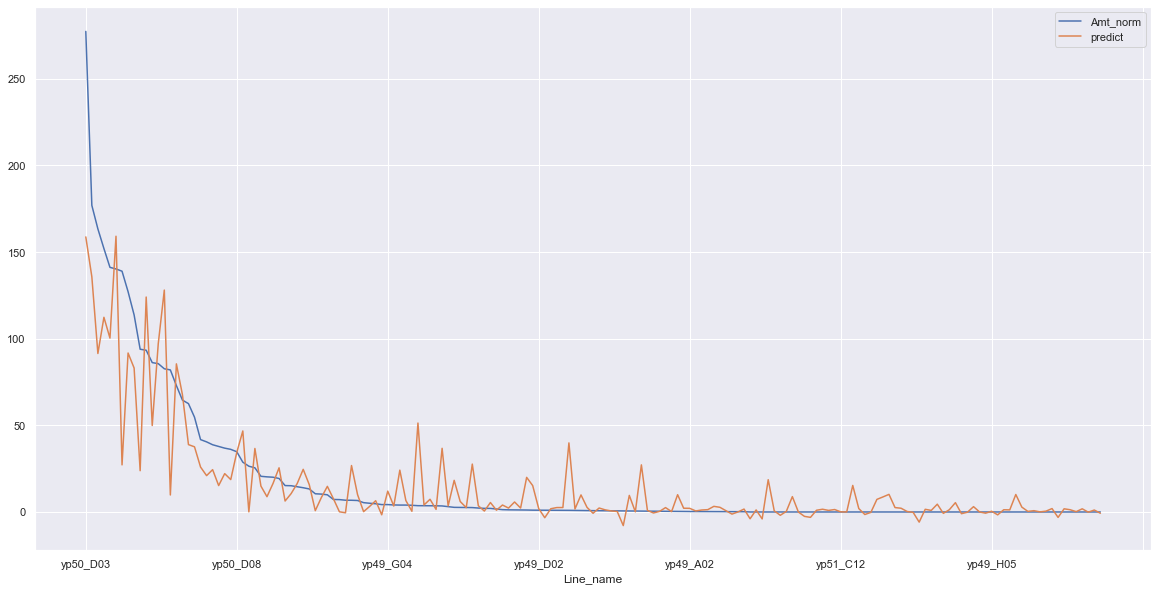

In [59]:
sns.set_context("paper", rc={"font.size":55,"axes.titlesize":5,"axes.labelsize":5}) 
sns.set(rc = {'figure.figsize':(30,10) })
df3.plot(y = ['Amt_norm','predict'], x =  'Line_name', figsize = (20,10))

#ax = plt.gca()
ax.set_title("Prediction and production of strictosidine of the seen library_1st_analytics")

name = 'Prediction of the sampled library lineplot'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)




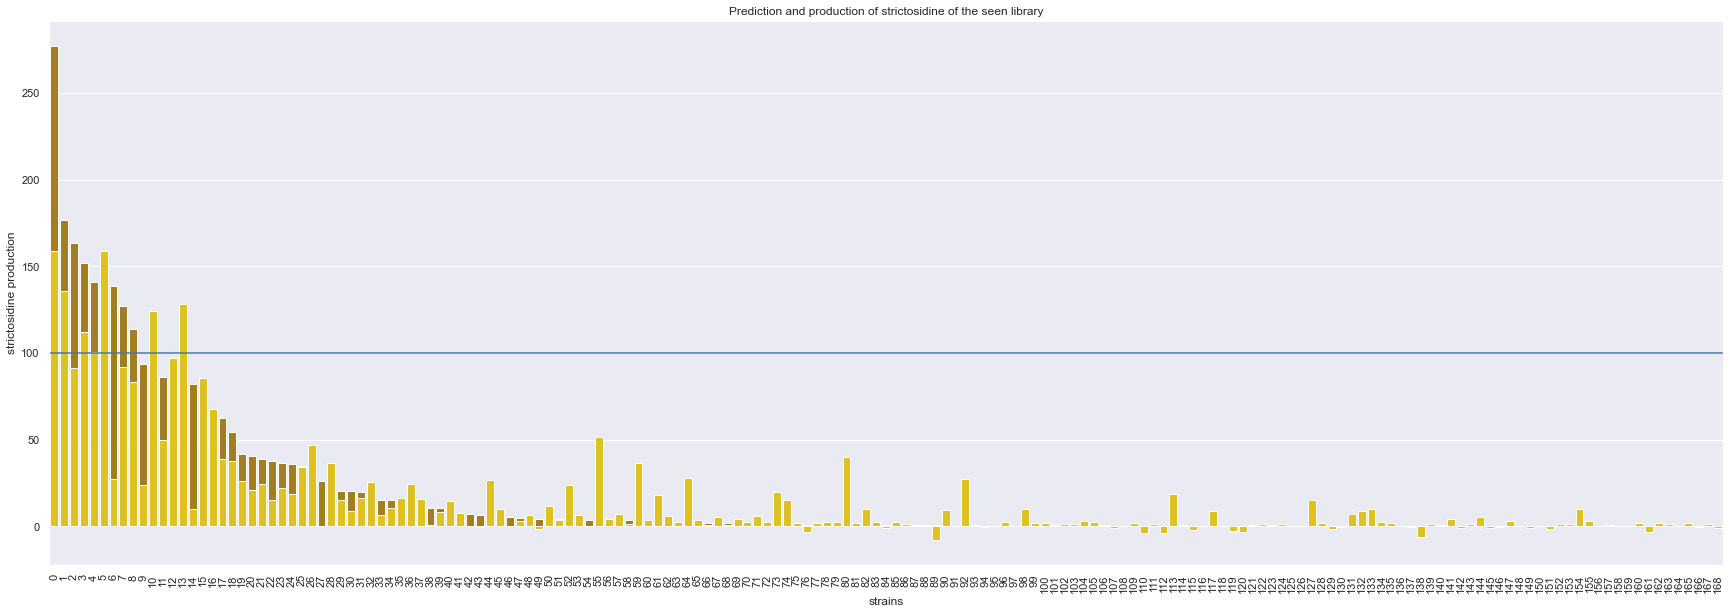

In [60]:
import matplotlib.pyplot as plt
sns.set_context("paper", rc={"font.size":55,"axes.titlesize":5,"axes.labelsize":5}) 
sns.set(rc = {'figure.figsize':(30,10) })


#creating subplots
ax=plt.subplots()
 
#plotting columns
ax=sns.barplot(x=df3.index,y=df3["Amt_norm"],color = 'darkgoldenrod')
ax=sns.barplot(x=df3.index,y=df3["predict"],color = 'gold')

 
#renaming the axes
ax.set(xlabel="strains", ylabel="strictosidine production")
plt.xticks(rotation=90)

ax = plt.gca()
ax.set_title("Prediction and production of strictosidine of the seen library")
ax.axhline(100)


name = 'Prediction of the sampled library_stacked_bar_1st_analytics"'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


 
# visualizing illustration
plt.show()

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_706/1934060361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_706/1934060361.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'


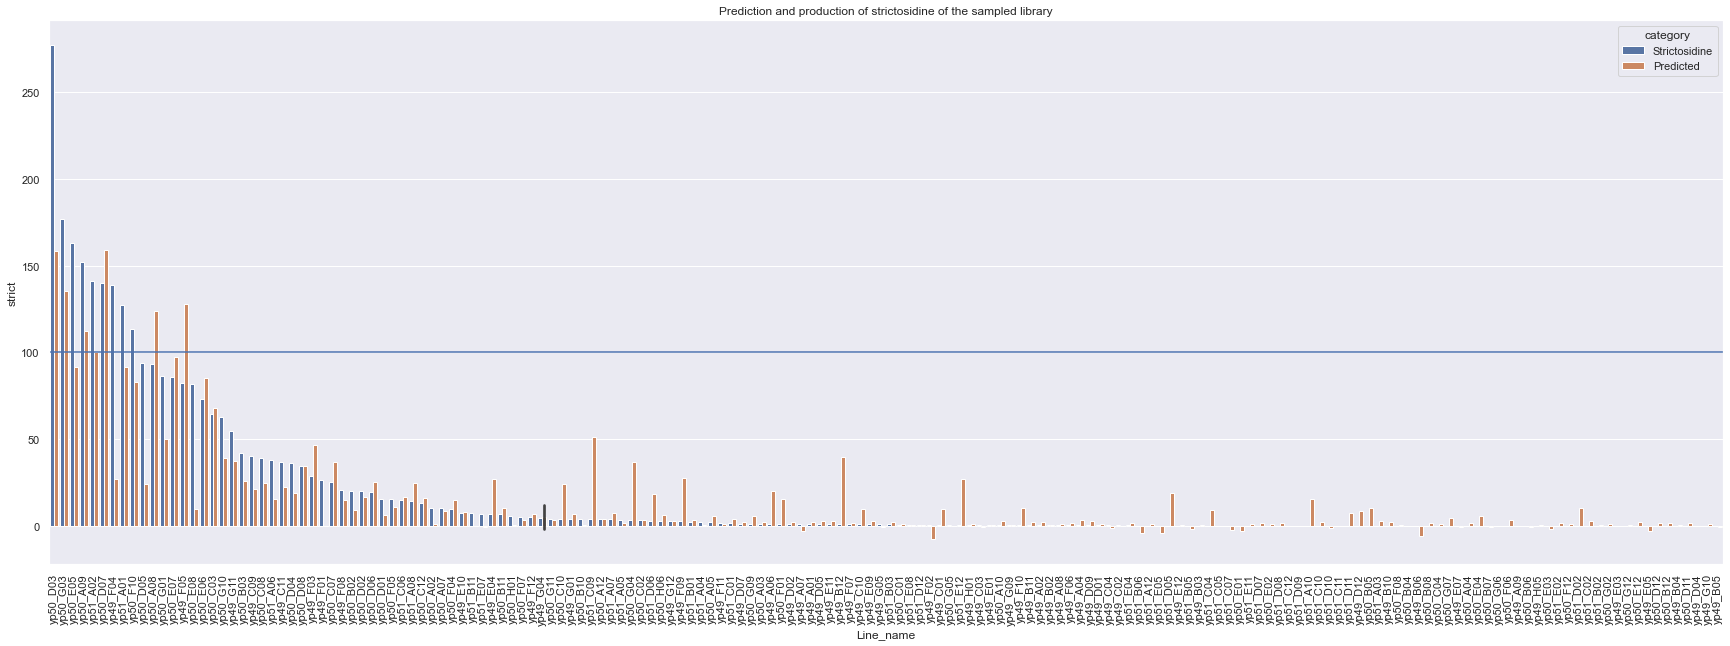

In [61]:
sns.set(rc = {'figure.figsize':(30,10) })


ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_title("Prediction and production of strictosidine of the sampled library")
plt.xticks(rotation=90)
ax.axhline(100)
#ax.add_line
name = 'Prediction of the sampled library_1st_analytics"'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)




None


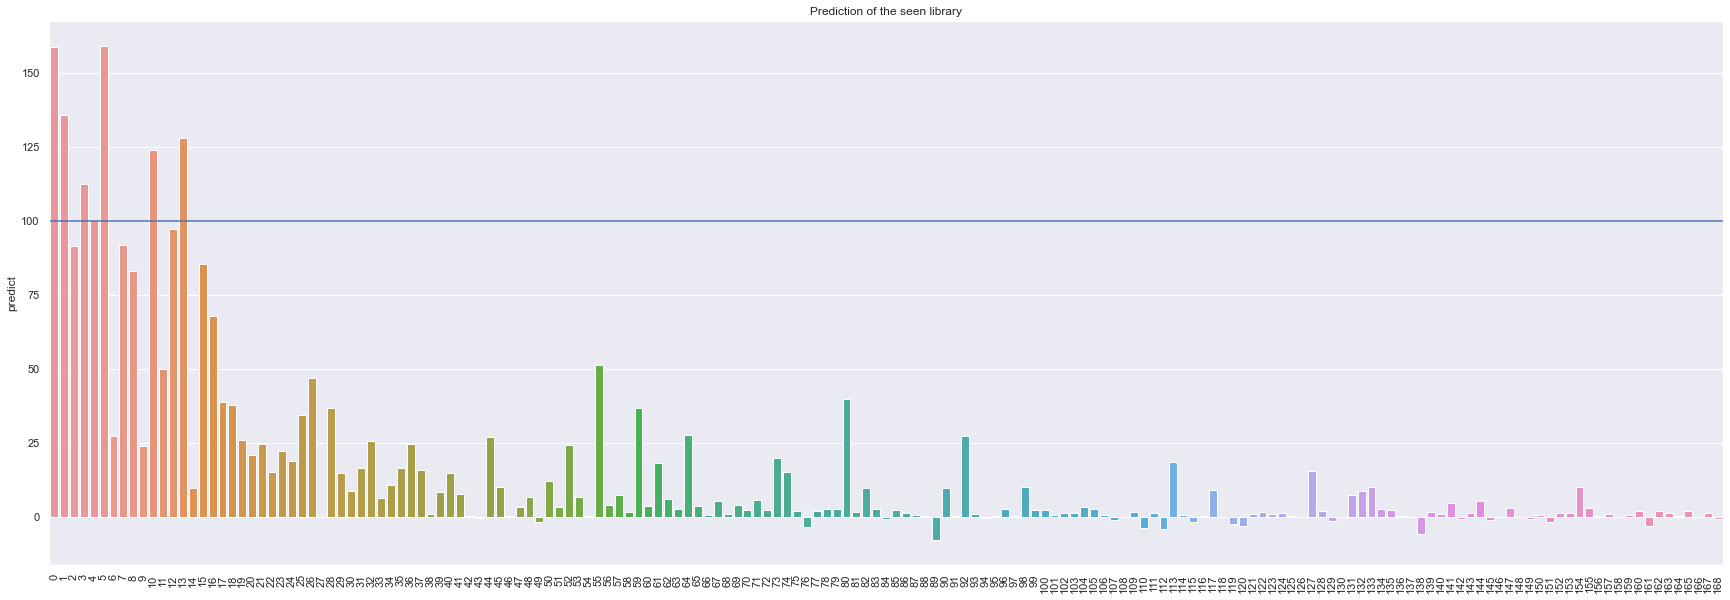

In [62]:
sns.set(rc = {'figure.figsize':(30,10) })

histogram = sns.barplot(data=df3, x=df3.index, y='predict')
histogram.axhline(100)
ax = plt.gca()
ax.set_title("Prediction of the seen library")

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)


name = 'Prediction of the sampled library_1st_analytics"'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


# this makes sure the labels are not shown
None

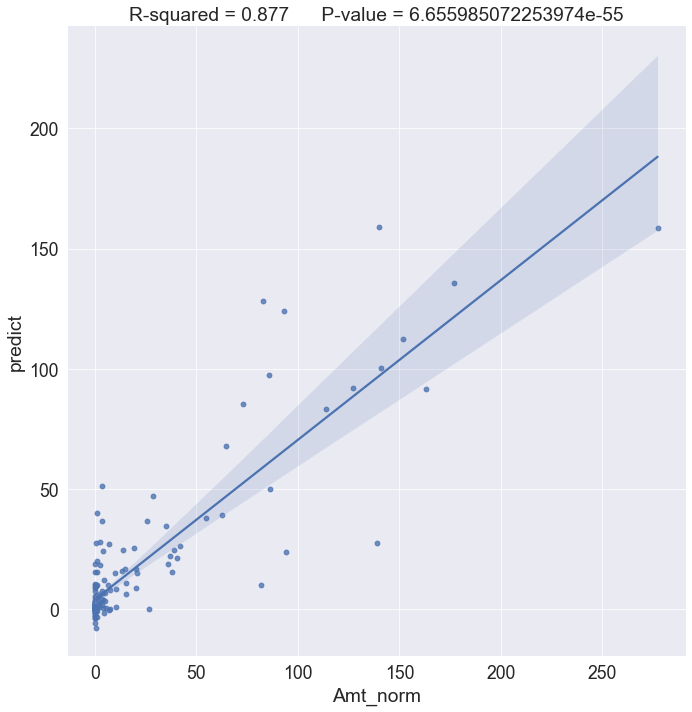

In [63]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis", fit_reg = True, height=10)
r, p = stats.pearsonr(df3['Amt_norm'], df3['predict'])


ax = plt.gca()
ax.set_title(f"R-squared = {r:.3f}      P-value = {p}")

name = 'predicted_vs_amtnorm_corr_1st_analytics"'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


None

### 4.2 Learning curve

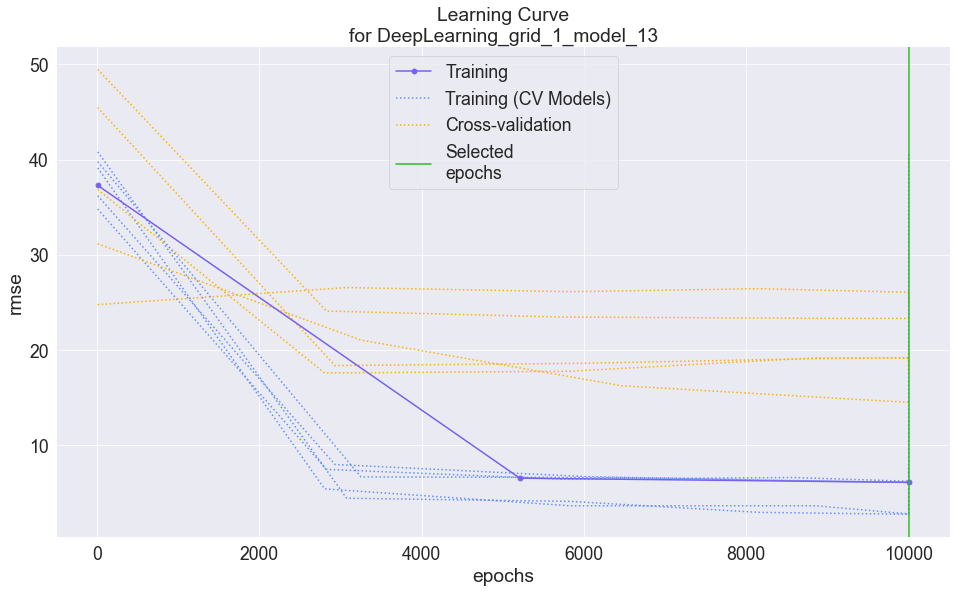

In [64]:

learning_curve = uploaded_model.learning_curve_plot()


sns.set()
sns.despine(bottom = True, left = True)
sns.set_style("whitegrid", {'axes.grid' : False})



# removes the borders around the plot
sns.despine(bottom = True, left = True)
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1})



name = 'learning_curve_merged_data_1st_analytics"'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)

None

## 5. Find predicted genotypes

In [65]:
import numpy as np

In [66]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [67]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,1,2,5,1
1,1,2,5,9
2,2,4,7,3
3,2,1,5,7
4,3,3,6,1
...,...,...,...,...
164,8,3,7,2
165,8,2,7,6
166,8,1,6,10
167,6,1,8,2


### 5.1 Getting rid of the genotypes we have already tested:

In [68]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [69]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [70]:
predicted = best_model.predict(all_genotypes_df)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [71]:
len(predicted)

1119

In [72]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,2.579958
1,3.176528
2,0.002139
3,2.422517
4,-2.720171


## 6. Predict the  phenotypes from the whole library

In [73]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_706/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
697,5,2,6,8,225.743528
690,5,2,6,1,204.968029
694,5,2,6,5,202.269288
852,6,2,6,3,200.760791
682,5,2,5,3,197.409566
...,...,...,...,...,...
172,2,1,6,3,-16.093237
12,1,1,6,3,-16.750207
1052,7,3,6,3,-17.163705
975,7,1,6,6,-17.955712


If we want the names on the genotypes we can do the following: 

In [74]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 7. Top 20 predicted producers

In [75]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(50)


,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cac,225.743528
1,Smus,ENO2,TPI1,Cro,204.968029
2,Smus,ENO2,TPI1,Rse,202.269288
3,Rsep,ENO2,TPI1,Ara,200.760791
4,Smus,ENO2,CCW12,Ara,197.409566
5,Smus,ENO2,TPI1,Aan,189.461697
6,Rsep,ENO2,TPI1,Cac,186.35631
7,Smus,ENO2,CCW12,Cac,172.421395
8,Smus,ENO2,TPI1,Clo,170.813394
9,Rsep,ENO2,TPI1,Cro,165.325341


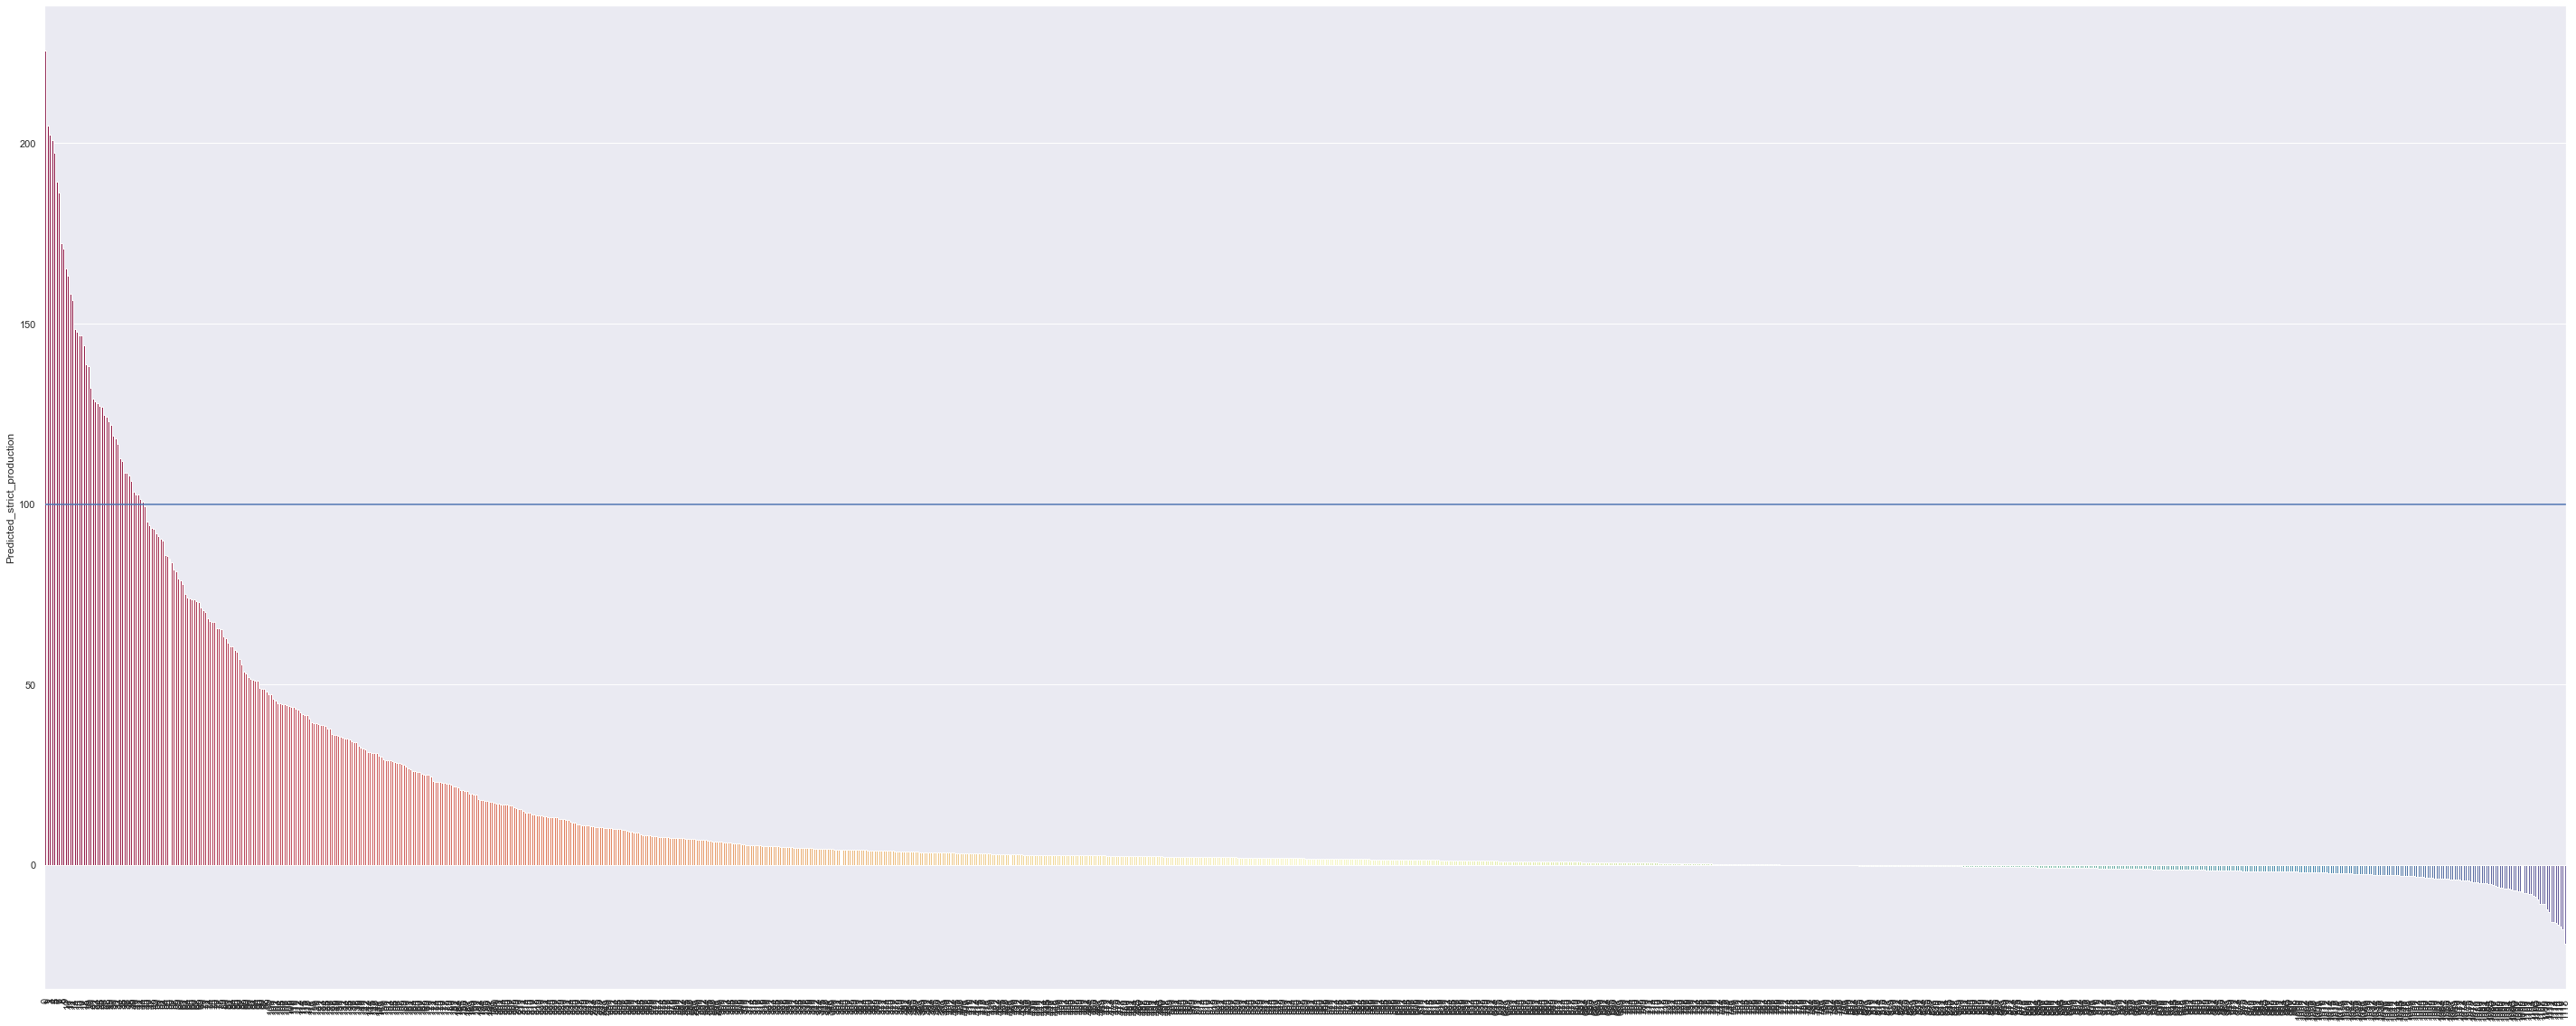

In [76]:
sns.set(rc = {'figure.figsize':(50,20) })

histogram = sns.barplot(data=df_with_genotypes, x=df_with_genotypes.index, y='Predicted_strict_production', palette= "Spectral")

histogram.axhline(100)

histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)

name = 'Predicted strict production of all unseen genotype_1st_analytics'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)

# this makes sure the labels are not shown
None

In [77]:
#df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/processed/ML_predicted/2022_2807_categorical_DeepLearning_grid_2_AutoML_1_20220919_101302_model_8')

In [78]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/predicted_unseen_comb_ML1_trained_on_1st_analytics".csv')
